# TensorFlow从入门到精通
# 01 简单线性模型（Simple Linear Model）

Author: Amusi

Date: 2018-06-30

github: [TensorFlow从入门到精通](https://github.com/amusi/TensorFlow-From-Zero-To-One)

Reference: [Magnus Erik Hvass Pedersen](http://www.hvass-labs.org/)
/ [GitHub](https://github.com/Hvass-Labs/TensorFlow-Tutorials) / [Videos on YouTube](https://www.youtube.com/playlist?list=PL9Hr9sNUjfsmEu1ZniY0XpHSzl5uihcXZ)



## 介绍

本教程介绍了使用TensorFlow实现简单线性模型的workflow。在加载MNISIT（手写字符图像数据集）后，我们使用TensorFlow定义并优化一个简单的数学模型。然后绘制并讨论结果。

This tutorial demonstrates the basic workflow of using TensorFlow with a simple linear model. After loading the so-called MNIST data-set with images of hand-written digits, we define and optimize a simple mathematical model in TensorFlow. The results are then plotted and discussed.

你应该熟悉基本的线性代数，Python，Jupyter Notebook编辑器。如果你对机器学习和分类有基本的了解，这也会帮助到你。

You should be familiar with basic linear algebra, Python and the Jupyter Notebook editor. It also helps if you have a basic understanding of Machine Learning and classification.

## 导入必要库（Imports）

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

D:\Program Files\Anaconda3_4.2\envs\tf14\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


This was developed using Python 3.5 (Anaconda) or later and TensorFlow version:

In [2]:
tf.__version__

'1.4.0'

大家可能会对上述代码中的第一句 %matplotlib inline有所好奇，该语句怎么是这样的？其作用是什么？

这里Amusi引出两种介绍，第一种是根本性解释，第二种是适用于此代码的解释。

**第一种解释[1]：**

%matplotlib inline 是一个魔法函数（Magic Functions）。官方给出的定义是：IPython有一组预先定义好的所谓的魔法函数（Magic Functions），你可以通过命令行的语法形式来访问它们。可见“%matplotlib inline”就是模仿命令行来访问magic函数的在IPython中独有的形式。

magic函数分两种：一种是面向行的，另一种是面向单元型的。

行magic函数是用前缀“%”标注的，很像我们在系统中使用命令行时的形式，例如在Mac中就是你的用户名后面跟着“$”。“%”后面就是magic函数的参数了，但是它的参数是没有被写在括号或者引号中来传值的。

单元型magic函数是由两个“%%”做前缀的，它的参数不仅是当前“%%”行后面的内容，也包括了在当前行以下的行。

注意：既然是IPython的内置magic函数，那么在Pycharm中是不会支持的。

总结：%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以**内嵌绘图，并且可以省略掉plt.show()这一步。**


**第二种解释[2]：**

%matplotlib inline比较奇怪，而且无论你是用哪个python的IDE如spyder或者pycharm,这个地方都会报错，显示是invalid syntax（无效语法）。那为什么代码里面还是会有这一句呢？原来是这样的。
%matplotlib作用

是在使用jupyter notebook 或者 jupyter qtconsole的时候，才会经常用到%matplotlib，也就是说那一份代码可能就是别人使用jupyter notebook 或者 jupyter qtconsole进行编辑的。关于jupyter notebook是什么，可以参考这个链接：[Jupyter Notebook介绍、安装及使用教程][1]
而%matplotlib具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。
而我们在spyder或者pycharm实际运行代码的时候，可以直接注释掉这一句，也是可以运行成功的。如下示例：


**Amusi 总结：**

为了在Jupyter Notebook中使用matplotlib.pyplot的plot函数，即实现内嵌绘图，而需要加上%matplotlib inline

参考：
[1]：https://blog.csdn.net/liangzuojiayi/article/details/78183783?locationNum=8&fps=1
[2]：https://www.jianshu.com/p/2dda5bb8ce7d

## 加载数据（Load Data）

如果在给定路径下，没有MNIST数据集，那么程序会自动下载该数据集（大约11MB）

The MNIST data-set is about 11 MB and will be downloaded automatically if it is not located in the given path.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


现在 MNIST数据集已经加载好，该数据集包含70,000幅图像和标签（即图像的类别）。数据集被分成3个互不交叉的子集（训练集、测试集和验证集），在本教程中，我们将只使用训练集和测试集。

其中：

- 训练集（Training set）：55000幅图像

- 测试集（Test set）：10000幅图像

- 验证集（Validation set）：5000幅图像

The MNIST data-set has now been loaded and consists of 70.000 images and associated labels (i.e. classifications of the images). The data-set is split into 3 mutually exclusive sub-sets. We will only use the training and test-sets in this tutorial.

In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


### 独热编码（One-Hot Encoding）

MNIST数据集由One-hot encoding方式加载。这意味着标签由单个数字（类别）转换成一个向量，其长度等价于可能类别数量（如有10类，则长度为10）。向量的所有元素除了第i个元素为 1之外（因为该标签的类别是i），其它元素都为0。

The data-set has been loaded as so-called One-Hot encoding. This means the labels have been converted from a single number to a vector whose length equals the number of possible classes. All elements of the vector are zero except for the $i$'th element which is one and means the class is $i$. For example, the One-Hot encoded labels for the first 5 images in the test-set are:

In [5]:
# 输出测试集前5个标签的向量数据
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

我们还需要将类（classes）作为单个数字进行各种比较和性能测量，因此我们通过获取最高元素（其值为1）的索引来将One-Hot编码向量转换为单个数字。请注意，'class'这个词是Python中使用的关键字，因此我们需要使用名称'cls'。

We also need the classes as single numbers for various comparisons and performance measures, so we convert the One-Hot encoded vectors to a single number by taking the index of the highest element. Note that the word 'class' is a keyword used in Python so we need to use the name 'cls' instead.

In [6]:
# argmax(): Returns the indices of the maximum values along an axis
data.test.cls = np.array([label.argmax() for label in data.test.labels])

上面代码，我们使用了numpy的[argmax()函数](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argmax.html)。该函数的作用是：Returns the indices of the maximum values along an axis。因为类别向量中只有1是最大值，而1所在的索引位置就是我们所要的值。argmax()正好完美适用！

现在我们可以知道测试集中前5幅图像的类别。你可以将其与上述One-Hot编码向量进行比较。例如，第一幅图像的类是7，其对应于One-Hot编码向量中索引为7的元素，该元素值为1。

We can now see the class for the first five images in the test-set. Compare these to the One-Hot encoded vectors above. For example, the class for the first image is 7, which corresponds to a One-Hot encoded vector where all elements are zero except for the element with index 7.

In [7]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

### 数据维度（Data dimensions）

数据维度会在下面的代码中被使用。在计算机编程中，最好使用使用变量（variables）和常量（constants），而不是每次使用该编号时候都必须对特定数字进行硬编码（hard-code）。这意味着数字只需要在一个地方被修改。理想情况下，这些数据可以从已经读取的数据中推断（inferred）出来，但在这里我们只是写出数字。

The data dimensions are used in several places in the source-code below. In computer programming it is generally best to use variables and constants rather than having to hard-code specific numbers every time that number is used. This means the numbers only have to be changed in one single place. Ideally these would be inferred from the data that has been read, but here we just write the numbers.

In [8]:
# MNIST图像数据的每个维度是28个像素（即28x28）
img_size = 28

# 图像存储在一维数组中
img_size_flat = img_size * img_size

# 将图像的高度和宽度变成不可变的元组（tuple），用于 reshape arrays。
img_shape = (img_size, img_size)

# 类别的数量：10，即每一类用一个数值来表示
num_classes = 10

### 绘图的帮助函数（Helper-function for plotting images）

函数使用3x3网格绘制9幅图像，并在每幅图像下面显示真实正确的类别和预测的类别。

Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.

In [9]:
def plot_images(images, cls_true, cls_pred=None):
    # 判断输入参数是否符合要求
    assert len(images) == len(cls_true) == 9
    
    # 创建3x3的图和subplots的集合
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # 绘图
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        # 显示正确和预测的类别
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])  # "{N}".format(n0,n1,...,nN)一定要掌握这种写法
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # 删除plot的刻度（ticks）
        ax.set_xticks([])
        ax.set_yticks([])
        
    # 在单个Notebook 单元格中正确的显示plot图。
    plt.show()

### 绘制一些图像检查数据是否正确

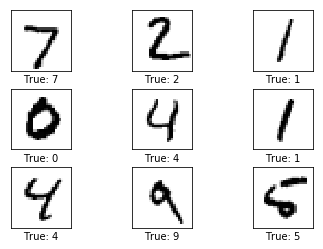

In [10]:
# 从测试集中获得前9幅图像数据
images = data.test.images[0:9]

# 获得相应的正确类别
cls_true = data.test.cls[0:9]

# 使用上述函数绘制图像和标签（非预测）
plot_images(images=images, cls_true=cls_true)

## TensorFlow 图（Graph）

TensorFlow 的目的是实现一个计算图（computational graph），与直接在Python中执行的计算相比，其可以更有效的执行。TensorFlow可以比Numpy更有效，因为TensorFlow知道必须执行的整个计算图，而Numpy一次只知道单个数学运算的计算。

TensorFlow 还可以自动计算优化图中变量所需的梯度，以使得模型更好地运行。这是因为图（Graph）是简单数学表达式的组合，因此可以使用微分（derivatives）的链式法则（chain-rule）来计算整个图的梯度。

TensorFlow 还可以利用多核CPU和GPU的，而且Google甚至为TensorFlow研发了专用芯片，称为TPU（Tensor Processing Units），甚至比GPU更快。

TensorFlow图由以下部分组成，将在下面详述：

- 占位符（Placeholder）变量用于改变图的输入

- 模型变量将进行优化，以使模型表现更好

- 模型本质上是数学函数，它很具占位符变量和模型变量的输入计算一些输出

- 一种指导变量优化的代价度量（cost measure）

- 一种更新模型变量的优化方法

此外，TensorFlow图还可以包含各种调试语句，例如：可以由TensorBoard可视化的日志数据（本教程没有介绍）

The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. TensorFlow can be more efficient than NumPy because TensorFlow knows the entire computation graph that must be executed, while NumPy only knows the computation of a single mathematical operation at a time.

TensorFlow can also automatically calculate the gradients that are needed to optimize the variables of the graph so as to make the model perform better. This is because the graph is a combination of simple mathematical expressions so the gradient of the entire graph can be calculated using the chain-rule for derivatives.

TensorFlow can also take advantage of multi-core CPUs as well as GPUs - and Google has even built special chips just for TensorFlow which are called TPUs (Tensor Processing Units) and are even faster than GPUs.

A TensorFlow graph consists of the following parts which will be detailed below:

* Placeholder variables used to change the input to the graph.
* Model variables that are going to be optimized so as to make the model perform better.
* The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
* A cost measure that can be used to guide the optimization of the variables.
* An optimization method which updates the variables of the model.

In addition, the TensorFlow graph may also contain various debugging statements e.g. for logging data to be displayed using TensorBoard, which is not covered in this tutorial.

### 占位符变量（Placeholder variables）

占位符变量（Placeholder variables）作为图的输入，我们可以在每次执行图的时候进行更改。我们称之为 喂（feeding）占位符变量，并在下面进一步说明。

Placeholder variables serve as the input to the graph that we may change each time we execute the graph. We call this feeding the placeholder variables and it is demonstrated further below.

首先，我们定义输入图像的**占位符变量‘x’**。这允许我们改变输入到TensorFlow图的图像。这是一个所谓的张量（tensor），这意味着它是一个多维向量或矩阵。**该占位符的数据类型设置成‘float32’，形状设置成‘[None, img_size_flat]’，其中‘None’表示张量可以存储（hold）任意数量的图像，每个图像是长度为‘img_size_flat’的向量。**

First we define the placeholder variable for the input images. This allows us to change the images that are input to the TensorFlow graph. This is a so-called tensor, which just means that it is a multi-dimensional vector or matrix. The data-type is set to `float32` and the shape is set to `[None, img_size_flat]`, where `None` means that the tensor may hold an arbitrary number of images with each image being a vector of length `img_size_flat`.

In [11]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

接下来，我们定义占位符变量**‘y_true’**，其是存放与占位符‘x’中输入图像相关联的真实标签。**该占位符变量的数据类型设置成‘float32’，形状是‘[None, num_classes]’，这意味着它可以包含任意数量的标签，每个标签是长度为‘num_classes’的向量，在这种情况下为10。**

Next we have the placeholder variable for the true labels associated with the images that were input in the placeholder variable `x`. The shape of this placeholder variable is `[None, num_classes]` which means it may hold an arbitrary number of labels and each label is a vector of length `num_classes` which is 10 in this case.

In [12]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

最后，我们定义**占位符变量‘y_true_cls’**，其实存放与占位符‘x’中输入图像相关的类别。**该占位符的数据类型设置成‘int64’，形状设置为‘[None]’，这意味着该占位符变量是任意长度的一维向量。**

Finally we have the placeholder variable for the true class of each image in the placeholder variable `x`. These are integers and the dimensionality of this placeholder variable is set to `[None]` which means the placeholder variable is a one-dimensional vector of arbitrary length.

In [13]:
y_true_cls = tf.placeholder(tf.int64, [None])

### 待优化的变量（Variables to be optimized）

除了上面定义用作将输入数据输入到模型中的占位符变量之外，还有一些模型变量必须由TensorFlow进行更改，以使模型在训练数据上表现更好。

Apart from the placeholder variables that were defined above and which serve as feeding input data into the model, there are also some model variables that must be changed by TensorFlow so as to make the model perform better on the training data.

必须优化的第一个变量称为**“权重（weights）”**，在这里定义为TensorFlow变量，必须用零初始化，形状为[img_size_flat，num_classes]，因此它是具有`img_size_flat`行和`num_classes`列的二维张量（或矩阵） 。

The first variable that must be optimized is called `weights` and is defined here as a TensorFlow variable that must be initialized with zeros and whose shape is `[img_size_flat, num_classes]`, so it is a 2-dimensional tensor (or matrix) with `img_size_flat` rows and `num_classes` columns.

In [14]:
# tf.zeros: 返回全是由0元素组成的值
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

第二个必须要优化的变量称为**“偏置（biases)”**，其实长度为‘num_classes’的一维度张量（或向量）。这里也初始化为零。

The second variable that must be optimized is called `biases` and is defined as a 1-dimensional tensor (or vector) of length `num_classes`.

In [15]:
biases = tf.Variable(tf.zeros([num_classes]))

### 模型（Model）

简单的数学模型是将占位符变量‘x’乘以权重‘weights’，并加上偏置‘biases’

This simple mathematical model multiplies the images in the placeholder variable `x` with the `weights` and then adds the `biases`.

根据矩阵性质，输出结果是形状为‘[num_images, num_classes]’的矩阵。因为‘x’的形状为‘[num_images, img_size_flat]’，‘weights’的形状为‘[img_size_flat, num_classes]’，所以这两个矩阵相乘的结果是形状为‘[num_images, num_classes]’的矩阵。然后将‘biases’向量加到矩阵的每一行上（利用广播的特性）。

The result is a matrix of shape `[num_images, num_classes]` because `x` has shape `[num_images, img_size_flat]` and `weights` has shape `[img_size_flat, num_classes]`, so the multiplication of those two matrices is a matrix with shape `[num_images, num_classes]` and then the `biases` vector is added to each row of that matrix.

注意：名称‘logits’是典型的TensorFlow术语（terminogy），但你也可以叫做其它变量。

Note that the name `logits` is typical TensorFlow terminology, but other people may call the variable something else.

In [16]:
logits = tf.matmul(x, weights) + biases

现在`logits`是一个带有`num_images`行和`num_classes`列的矩阵，其中第 i 行和第 j 列的元素是对第 i 幅输入图像估计为第 j 类的可能性（概率值）。

Now `logits` is a matrix with `num_images` rows and `num_classes` columns, where the element of the $i$'th row and $j$'th column is an estimate of how likely the $i$'th input image is to be of the $j$'th class.

然而，这些估计是大概的（rough）值且难以解释，因为这些数字可能非常小或很大，所以我们想对它们进行归一化处理，以使`logits`矩阵的每一行总和为1（因为概率值和为1)，并且每个元素被限制在[0,1]。这是使用所谓的[softmax函数](https://zh.wikipedia.org/wiki/Softmax函数)（又称归一化指数函数）计算的，结果存储在`y_pred`中。

However, these estimates are a bit rough and difficult to interpret because the numbers may be very small or large, so we want to normalize them so that each row of the `logits` matrix sums to one, and each element is limited between zero and one. This is calculated using the so-called softmax function and the result is stored in `y_pred`.

注：附上Softmax相关资源

[1] [Softmax function wiki](https://en.wikipedia.org/wiki/Softmax_function)

[2] [Softmax 函数的特点和作用是什么？](https://www.zhihu.com/question/23765351)

[3] [Softmax回归](http://ufldl.stanford.edu/wiki/index.php/Softmax回归)

In [17]:
y_pred = tf.nn.softmax(logits)

可以通过获取 `y_pred`矩阵中每行中最大元素的索引计算预测的类别 `y_pred_cls`。

The predicted class can be calculated from the `y_pred` matrix by taking the index of the largest element in each row.

In [27]:
y_pred_cls = tf.argmax(y_pred, axis=1)

### 待优化的代价函数（Cost-function to be optimized）

为了使模型更好地分类输入图像，我们必须以某种方式改变“权重”（weights）和“偏差”（biases）的变量。要做到这一点，首先我们需要通过将模型的预测输出“y_pred”与期望输出“y_true”进行比较来了解模型当前的表现如何。

To make the model better at classifying the input images, we must somehow change the variables for `weights` and `biases`. To do this we first need to know how well the model currently performs by comparing the predicted output of the model `y_pred` to the desired output `y_true`.


[交叉熵（cross-entropy）](https://en.wikipedia.org/wiki/Cross_entropy)是用于分类的性能度量。交叉熵是一个连续的函数，它总是正的，如果模型的预测输出与期望的输出完全匹配，则交叉熵等于零。因此，优化的目标是尽量减少交叉熵，即通过改变模型的“权重”和“偏差”来使得交叉熵尽可能地接近于零。

The cross-entropy is a performance measure used in classification. The cross-entropy is a continuous function that is always positive and if the predicted output of the model exactly matches the desired output then the cross-entropy equals zero. The goal of optimization is therefore to minimize the cross-entropy so it gets as close to zero as possible by changing the `weights` and `biases` of the model.


TensorFlow具有用于计算交叉熵的内置函数。 请注意，它使用`logits`的值，因为它也可以在内部计算softmax。

TensorFlow has a built-in function for calculating the cross-entropy. Note that it uses the values of the `logits` because it also calculates the softmax internally.

In [28]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)

我们现在已经计算了每个图像分类的交叉熵，因此我们可以衡量模型在每幅图像上的测试性能。但为了使用交叉熵来指导模型变量的优化，我们需要一个标量值，所以我们简单地取所有图像分类的交叉熵的平均值。

We have now calculated the cross-entropy for each of the image classifications so we have a measure of how well the model performs on each image individually. But in order to use the cross-entropy to guide the optimization of the model's variables we need a single scalar value, so we simply take the average of the cross-entropy for all the image classifications.

In [29]:
cost = tf.reduce_mean(cross_entropy)

### 优化方法（Optimization method）

现在我们有一个必须要最小化的代价度量（交叉熵），然后我们可以创建一个优化器（optimizer）。在这种情况下，我们采用 [tf的梯度下降优化器](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)，其步长设置为0.5。

Now that we have a cost measure that must be minimized, we can then create an optimizer. In this case it is the basic form of Gradient Descent where the step-size is set to 0.5.

注意：此处不执行优化。事实上，包括上述的操作，其实并没有进行运算，我们只是将待优化的对象添加到TensorFlow图中以便以后执行。

Note that optimization is not performed at this point. In fact, nothing is calculated at all, we just add the optimizer-object to the TensorFlow graph for later execution.

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

### 衡量指标（Performance measures）

我们需要更多的衡量指标来向用户显示进度。

无论预测的类别是否等于每个图像的真实类别，这都是布尔值（boolean）的矢量。

We need a few more performance measures to display the progress to the user.

This is a vector of booleans whether the predicted class equals the true class of each image.

In [31]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

这通过首先将布尔值的矢量类型转换为浮点数来计算分类准确度，以便False变为0，True变为1，然后计算这些数字的平均值。

注：使用 [tf.cast](https://www.tensorflow.org/versions/r1.9/api_docs/python/tf/cast) 将数据类型进行变换

This calculates the classification accuracy by first type-casting the vector of booleans to floats, so that False becomes 0 and True becomes 1, and then calculating the average of these numbers.

In [33]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 运行TensorFlow（TensorFlow Run）

### 创建TensorFlow会话（Create TensorFlow session）

一旦创建好TensorFlow图（graph），我们还需要创建一个用于执行图的TensorFlow会话。

Once the TensorFlow graph has been created, we have to create a TensorFlow session which is used to execute the graph.

In [34]:
session = tf.Session()

### 初始化变量（Initialize variables）

变量 `weights` 和 `biases`必须在开始优化前进行初始化。

注：一般采用 [tf.global_variables_initializer()](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer)对所有变量进行初始化。

The variables for `weights` and `biases` must be initialized before we start optimizing them.

In [36]:
session.run(tf.global_variables_initializer())

### 执行迭代优化的帮助函数（Helper-function to perform optimization iterations）

训练集含有50,000 幅图像。使用所有这些图像来计算模型的梯度耗时较久。因此，我们使用随机梯度下降法（Stochastic Gradient Descent，SGD），它只在优化器的每次迭代中使用一小批（small batch）图像。

There are 50.000 images in the training-set. It takes a long time to calculate the gradient of the model using all these images. We therefore use Stochastic Gradient Descent which only uses a small batch of images in each iteration of the optimizer.

In [38]:
batch_size = 100

用于执行若干次优化迭代的函数，以逐渐改善模型的“权重”和“偏差”。 在每次迭代中，从训练集中选择一批新的数据，然后TensorFlow使用这些训练样本执行优化器。

Function for performing a number of optimization iterations so as to gradually improve the `weights` and `biases` of the model. In each iteration, a new batch of data is selected from the training-set and then TensorFlow executes the optimizer using those training samples.

In [42]:
def optimize(num_iterations):
    '''优化器'''
    for i in range(num_iterations):
        # 获取一小批训练样本
        # x_batch 存储一小批训练样本，y_true_batch是这些训练样本（图像）的真实标签
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # 将批处理(batch)放入合适命名的字典中，该字典中的键（key）是TensorFlow图中的占位符变量（x、y_true和y_true_cls）。
        # 注意：占位符y_true_cls并不是集合（set），因为在训练时候，其没有被使用
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        
        # 使用小批量的训练数据来运行优化器
        # 在feed_dict_train中，TensorFlow将变量赋值给占位符变量，然后运行优化器
        session.run(optimizer, feed_dict = feed_dict_train)

### 显示的帮助函数（Helper-functions to show performance）

使用测试集数据（10,000幅图像）进行Dict，以用作TensorFlow图的输入。请注意，我们必须在TensorFlow图中使用占位符变量的正确名称。

Dict with the test-set data to be used as input to the TensorFlow graph. Note that we must use the correct names for the placeholder variables in the TensorFlow graph.

In [44]:
feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}

输出测试集上分类准确率的函数

Function for printing the classification accuracy on the test-set.

In [51]:
def print_accuracy():
    '''计算并输出准确率'''
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # 打印准确率
    print("Accuray on test-set: {0:.1%}".format(acc))

使用scikit-learn 输出并绘制 误差（confusion）矩阵的函数

Function for printing and plotting the confusion matrix using scikit-learn.

In [52]:
def print_confusion_matrix():
    '''输出误差（confusion）矩阵'''
    # 获得测试集的真实分类标签
    cls_true = data.test.cls
    
    # 计算测试集的预测分类结果
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # 使用sklearn计算误差矩阵，confusion_matrix是sklearn的API函数
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # 以文本的形式输出误差矩阵
    print(cm)

    # 以图像的形式绘制误差矩阵
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # 为绘图做不同的调整
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # 确保在单个Notebook网格中显示多个子图
    plt.show()

用于绘制来自测试集的图像的错误分类的示例的功能。

Function for plotting examples of images from the test-set that have been mis-classified.

In [53]:
def plot_example_errors():
    '''绘制分类错误的测试样本'''
    # 使用TensorFlow获取布尔值列表，无论每个测试图像是否已正确分类，以及每个图像的预测类列表
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)
 
    # 错误布尔数组
    incorrect = (correct == False)
    
    # 从测试集中获取已被错误分类的图像数据
    images = data.test.images[incorrect]
    
    # 获得这些图像的预测类别
    cls_pred = cls_pred[incorrect]

    # 获得这些图像的真实类别
    cls_true = data.test.cls[incorrect]
    
    # 绘制前9幅图像（错误分类）
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

### 绘制模型权重的帮助函数（Helper-function to plot the model weights）

用于绘制模型权重的函数。绘制10幅图像，每幅图像对应于被模型训练识别的类别。

Function for plotting the `weights` of the model. 10 images are plotted, one for each digit that the model is trained to recognize.

In [54]:
def plot_weights():
    '''绘制模型权重'''
    # 从TensorFlow变量中获得权重的值
    w = session.run(weights)
    
    # 计算权重的最小值和最大值
    # 这用于校正图像间的颜色强度，以便它们可以相互比较
    w_min = np.min(w)  # 权重的最小值
    w_max = np.max(w)  # 权重的最大值

    # 创建含 3x4子图的图像，其中最后两个子图无意义。
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # 获得第i幅图像的权重，并改变其形状与图像数据一致
            # 注意：w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # 为子图设置标签（lable）
            ax.set_xlabel("Weights: {0}".format(i))

            # 绘制图像
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        # 删除每个子图的刻度
        ax.set_xticks([])
        ax.set_yticks([])
        
    # 显示图像
    plt.show()

## 优化前的性能（Performance before any optimization）

测试集的准确度为9.8％。这是因为该模型只进行了初始化而没有进行优化，因此它总是预测图像显示为零数字（预测类别为零），如下图所示。

print_accuray()表示在会话中执行图，即发生了“真正”的运算。

The accuracy on the test-set is 9.8%. This is because the model has only been initialized and not optimized at all, so it always predicts that the image shows a zero digit, as demonstrated in the plot below, and it turns out that 9.8% of the images in the test-set happens to be zero digits.

In [58]:
# 输出测试集上的准确率
print_accuracy()

Accuray on test-set: 9.8%


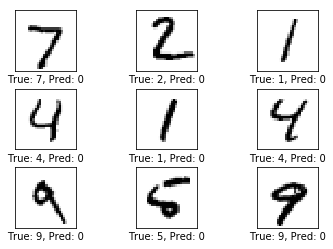

In [59]:
# 绘制错误样本
plot_example_errors()

## 在第一次迭代优化后的性能（Performance after 1 optimization iteration）

经过一次优化迭代后，该模型已将测试集的准确度从9.8％提高到40%~60％。这意味着它在10次中有4~6次对图像进行了错误分类，如下面的几个例子所示。

Already after a single optimization iteration, the model has increased its accuracy on the test-set to 40.7% up from 9.8%. This means that it mis-classifies the images about 6 out of 10 times, as demonstrated on a few examples below.

In [60]:
optimize(num_iterations=1)

In [61]:
print_accuracy()

Accuray on test-set: 52.2%


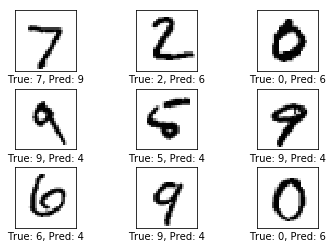

In [38]:
plot_example_errors()

权重也可以绘制如下所示。正面权重是红色，负面权重是蓝色。这些权重可以直观地理解为图像过滤器。

例如，用于确定图像是否显示零位的权重对圆形图像具有正面反应（红色），并对具有圆形中心内容的图像具有负面反应（蓝色）。

类似地，用于确定图像是否显示一位数字的权重对图像中心的垂直线作出正面（红色）反应，并对包含该线条内容的图像做出负面（蓝色）反应。

请注意，权重大多看起来像他们应该被识别出的数字。这是因为只执行了一次优化，所以权重仅在100幅（batch=100）图像上进行训练。在对数千幅图像进行训练之后，权重变得更加难以解释，因为他们必须认识到数字可以写成很多种变化形态。

The weights can also be plotted as shown below. Positive weights are red and negative weights are blue. These weights can be intuitively understood as image-filters.

For example, the weights used to determine if an image shows a zero-digit have a positive reaction (red) to an image of a circle, and  have a negative reaction (blue) to images with content in the centre of the circle.

Similarly, the weights used to determine if an image shows a one-digit react positively (red) to a vertical line in the centre of the image, and react negatively (blue) to images with content surrounding that line.

Note that the weights mostly look like the digits they're supposed to recognize. This is because only one optimization iteration has been performed so the weights are only trained on 100 images. After training on several thousand images, the weights become more difficult to interpret because they have to recognize many variations of how digits can be written.

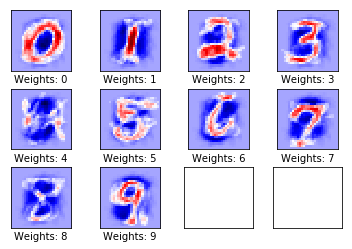

In [62]:
plot_weights()

## 在迭代10次优化后的性能（Performance after 10 optimization iterations）

In [63]:
# 我们已经执行过一次迭代
optimize(num_iterations=9)

In [64]:
print_accuracy()

Accuray on test-set: 80.7%


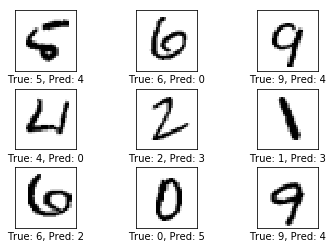

In [65]:
plot_example_errors()

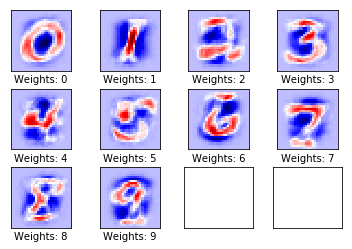

In [66]:
plot_weights()

## 在迭代1000次优化后的性能（Performance after 1000 optimization iterations）

在1000次迭代优化后，模型仅对大约十分之一的图像进行错误分类（即正确率在90%左右）。如下所示，一些误分类是合理的，因为即使对于人类来说，图像也很难确定，而其他图像非常明显，应该通过一个好的模型正确分类。但是这种简单的模型无法达到更好的性能，因此需要更复杂的模型。

After 1000 optimization iterations, the model only mis-classifies about one in ten images. As demonstrated below, some of the mis-classifications are justified because the images are very hard to determine with certainty even for humans, while others are quite obvious and should have been classified correctly by a good model. But this simple model cannot reach much better performance and more complex models are therefore needed.

In [67]:
# We have already performed 10 iterations.
optimize(num_iterations=990)

In [68]:
print_accuracy()

Accuray on test-set: 91.9%


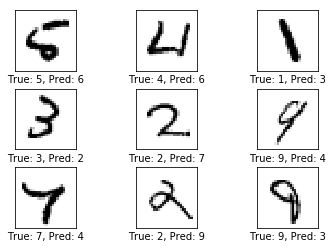

In [69]:
plot_example_errors()

该模型现已经过1000次迭代优化的训练，每次迭代使用来自训练集的100幅图像。由于图像种类繁多，权重现在变得难以解释，我们可能会怀疑模型是否真正了解数字是如何由线条组成的，或者模型是否只记住了许多不同的像素变体。

注：迭代越多次，可视化的权重变得越难以解释。

The model has now been trained for 1000 optimization iterations, with each iteration using 100 images from the training-set. Because of the great variety of the images, the weights have now become difficult to interpret and we may doubt whether the model truly understands how digits are composed from lines, or whether the model has just memorized many different variations of pixels.

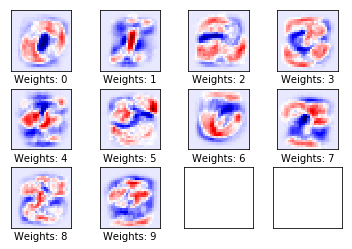

In [71]:
plot_weights()

我们还可以打印和绘制所谓的误差矩阵（confusion matrix），让我们可以看到有关错误分类的更多细节。例如，它显示实际描述 5的图像有时被错误分类为所有其它可能的数字，但大多数是3, 6或 8。

We can also print and plot the so-called confusion matrix which lets us see more details about the mis-classifications. For example, it shows that images actually depicting a 5 have sometimes been mis-classified as all other possible digits, but mostly either 3, 6 or 8.

[[ 958    0    2    2    0    3   11    2    2    0]
 [   0 1107    2    3    0    1    4    2   16    0]
 [   9    7  911   22   10    1   14   11   42    5]
 [   3    0   13  936    0   16    5   10   20    7]
 [   1    1    4    1  912    0   16    2   10   35]
 [  10    4    5   55   10  731   26    7   37    7]
 [  10    3    3    2    8    7  922    1    2    0]
 [   3   10   23    9   10    1    0  937    3   32]
 [   9    8    6   26    8   20   14    9  872    2]
 [  12    7    3   10   36    6    0   25    9  901]]


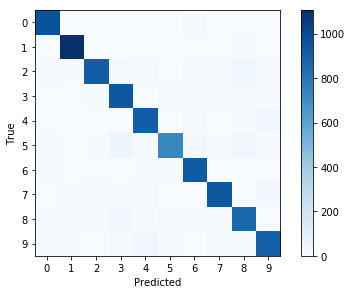

In [72]:
print_confusion_matrix()

上图分别显示了误差矩阵的文本形式和图像形式。其中文本形式可以看到误分类的具体情况，如真实为5的图像被预测为5的情况最多（预测正确），大概在700+
，其次被预测为3和8的情况也比较多。而图像可视化，可以较为直观地看出当前模型的分类准确情况。深蓝色表示多数图像被预测的结果分布，由上图可知：
预测结果和真实情况出入不大，模型的正确率还可以。

最后，我们通过关闭会话（Session）来释放内存资源。

We are now done using TensorFlow, so we close the session to release its resources.

In [74]:
# This has been commented out in case you want to modify and experiment
# with the Notebook without having to restart it.
session.close()

## 练习（Exercises）

下面是一些可能有助于提高TensorFlow技能的练习建议。获得TensorFlow的实践经验对于学习如何正确使用它非常重要。

These are a few suggestions for exercises that may help improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

进行任何更改之前，您可能需要备份此文件。

- 更改优化器的学习率（learning rate）。
- 将优化器更改为 AdagradOptimizer或 AdamOptimizer。
- 将批量大小更改为 1或 1000。
- 思考上述这些变化如何影响性能？
- 您是否认为这些变化对其他分类问题和数学模型具有相同的影响（如果有的话）？
- 如果多次运行本文件，而不更改任何参数，您会得到完全相同的结果吗？ 为什么或者为什么不？
- 更改函数plot_example_errors()，以便它还打印错误分类示例的logits和y_pred值。
- 使用sparse_softmax_cross_entropy_with_logits而不是softmax_cross_entropy_with_logits。 这可能需要对源代码中的多个位置进行多处更改。 讨论使用这两种方法的优缺点。
- 自己重新编写程序，而不必过多考虑此源代码。
- 向朋友解释程序是如何工作的。

You may want to backup this Notebook before making any changes.

* Change the learning-rate for the optimizer.
* Change the optimizer to e.g. `AdagradOptimizer` or `AdamOptimizer`.
* Change the batch-size to e.g. 1 or 1000.
* How do these changes affect the performance?
* Do you think these changes will have the same effect (if any) on other classification problems and mathematical models?
* Do you get the exact same results if you run the Notebook multiple times without changing any parameters? Why or why not?
* Change the function `plot_example_errors()` so it also prints the `logits` and `y_pred` values for the mis-classified examples.
* Use `sparse_softmax_cross_entropy_with_logits` instead of `softmax_cross_entropy_with_logits`. This may require several changes to multiple places in the source-code. Discuss the advantages and disadvantages of using the two methods.
* Remake the program yourself without looking too much at this source-code.
* Explain to a friend how the program works.

## License (MIT)

Copyright (c) 2016 by [Magnus Erik Hvass Pedersen](http://www.hvass-labs.org/)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.